In [1]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import msgpack
import os

c:\Users\Ernesto\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%time
with open('cards.msgpack', 'rb') as f:
    msgpack_data = f.read()
    cards = msgpack.unpackb(msgpack_data, raw=False)
print(len(cards))

CPU times: total: 0 ns
Wall time: 0 ns
17174


In [3]:
cards[0]

{'abilities': None,
 'artist': 'Kagemaru Himeno',
 'ancientTrait': None,
 'attacks': [{'name': 'Second Strike',
   'cost': ['Metal', 'Metal', 'Colorless'],
   'convertedEnergyCost': 3,
   'damage': '40',
   'text': 'If the Defending Pokémon already has any damage counters on it, this attack does 40 damage plus 40 more damage.'},
  {'name': 'Guard Claw',
   'cost': ['Metal', 'Metal', 'Colorless', 'Colorless'],
   'convertedEnergyCost': 4,
   'damage': '60',
   'text': "During your opponent's next turn, any damage done to Aggron by attacks is reduced by 20 (after applying Weakness and Resistance)."}],
 'cardmarket': {'url': 'https://prices.pokemontcg.io/cardmarket/hgss4-1',
  'updatedAt': '2023/12/13',
  'prices': {'averageSellPrice': 3.99, 'lowPrice': 0.4, 'trendPrice': 4.19}},
 'convertedRetreatCost': 4,
 'evolvesFrom': 'Lairon',
 'flavorText': 'You can tell its age by the length of its iron horns. It claims an entire mountain as its territory.',
 'hp': '140',
 'id': 'hgss4-1',
 'image

In [4]:
xyp = [card for card in cards if card['set']['id'] == 'xyp']
print(len(xyp))

216


In [5]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
# img_path = 'infernape-card.png'
img_path = 'Venusaur-EX.png'
# img_path = "infernape-dp1-121.png"
img_path = './card_img/' + img_path

In [7]:
image = cv2.imread(img_path)
name = image[10:90, 0:450]

In [8]:
detections = reader.readtext(name)


In [9]:
treshold = 0.7
for t in detections:
    bbox, text, score = t

    print(f"Text: {text}, Score: {score}")
    if score > treshold:
        cv2.rectangle(image, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(image, text, (bbox[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255,0, 0), 2)

Text: BASIC, Score: 0.32470612689598854
Text: Venusaur, Score: 0.9944655144706883


In [10]:
# cv2.imshow("Image", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

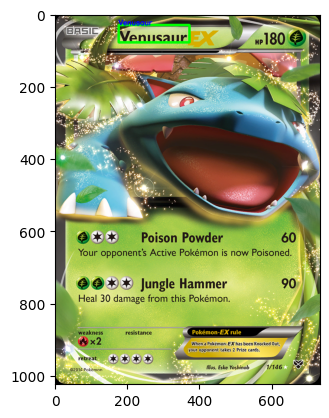

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))